In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/processed/hbn_vertexstats.csv')

sex = df.loc[:, 'sex']
data = df.loc[:, '0':'287']

print(df.shape)
df.head()

(91, 291)


,id,sex,age,0,1,2,3,4,5,6,...,278,279,280,281,282,283,284,285,286,287
0,NDARED632KNG,1,17.203855,0.691176,0.783333,0.489583,0.671429,0.734375,0.671429,0.701493,...,22.0,11.0,99.0,121.0,3.0,2.0,4.0,2.0,4.0,3.0
1,NDARFM080VAF,1,7.623203,0.610390,0.474747,0.734375,0.712121,0.522222,0.587500,0.661972,...,9.0,95.0,20.0,1.0,1.0,3.0,4.0,3.0,2.0,2.0
2,NDARFW130NGG,1,8.316107,0.635135,0.712121,0.489583,0.681159,0.723077,0.671429,0.691176,...,35.0,21.0,27.0,1.0,4.0,3.0,5.0,3.0,3.0,7.0
3,NDARHP656DLC,0,10.936459,0.626667,0.451923,0.652778,0.580247,0.559524,0.465347,0.652778,...,23.0,12.0,0.0,0.0,4.0,1.0,2.0,5.0,2.0,1.0
4,NDARDR658DRA,0,6.421857,0.626667,0.566265,0.494737,0.783333,0.712121,0.758065,0.671429,...,216.0,141.0,62.0,14.0,10.0,4.0,4.0,5.0,3.0,3.0


In [3]:
1-sum(df['sex'])/91

0.6703296703296704

In [4]:
pca = PCA(n_components=5)
X = pca.fit_transform(data)
X = pd.DataFrame.from_records(X)
X.columns = ['PC'+str(i+1) for i in range(5)]

In [5]:
print([round(i, 2) for i in pca.explained_variance_ratio_])

[0.76, 0.06, 0.05, 0.03, 0.02]


In [6]:
X['sex'] = df['sex']
X.head()

,PC1,PC2,PC3,PC4,PC5,sex
0,2.035659e+06,-441273.602373,-105506.508442,-39500.109040,2080.562684,1
1,-6.759445e+04,-320313.672364,224934.566170,149936.557871,-84079.411427,1
2,-3.185317e+05,-27495.773170,282568.225657,-277035.787392,-92351.675429,1
3,-2.118449e+06,-184276.929157,-170007.306041,302075.302028,-81416.936024,0
4,1.599019e+06,-360021.269402,-265444.085069,-81162.439537,178225.939685,0


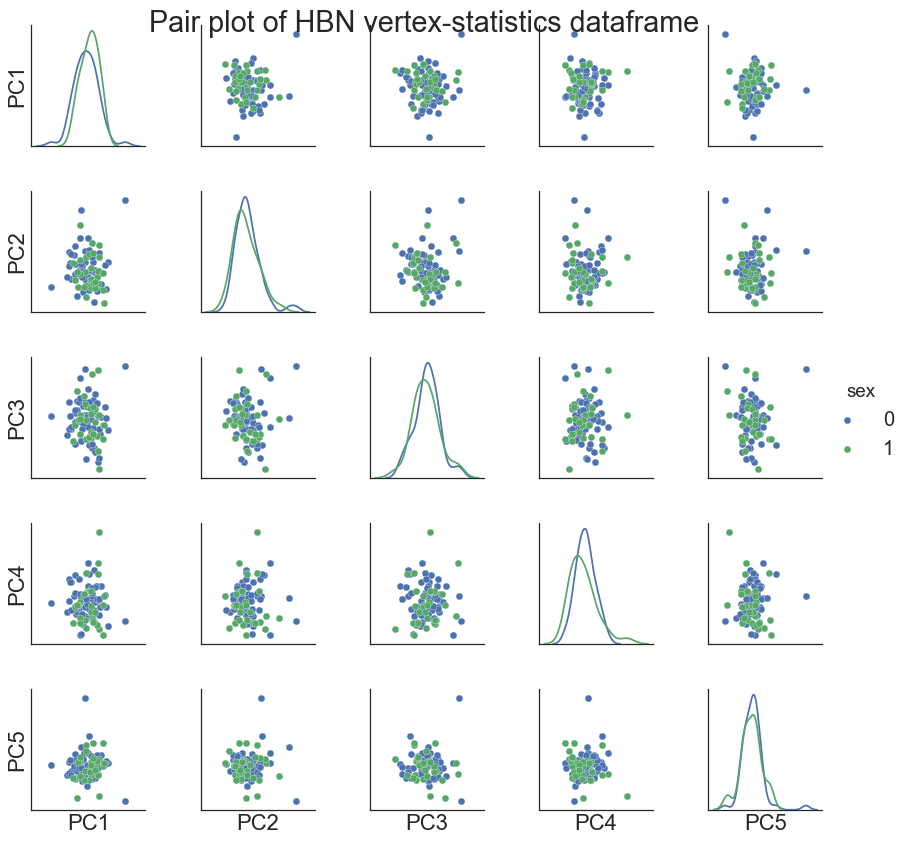

In [7]:
sns.set(style="ticks", color_codes=True, font_scale=2)
g = sns.pairplot(X, hue='sex', diag_kind="kde", vars=['PC'+str(i+1) for i in range(5)])
g.set(xticks=[], yticks=[])
g.savefig('pairsplot.png', dpi=400)
plt.suptitle('Pair plot of HBN vertex-statistics dataframe')
plt.show()

### Clustering

In [8]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [9]:
clf = RF(n_estimators=100, max_depth=2, random_state=0)
clf.fit(data, sex)

kf = KFold(n_splits=5)

In [10]:
res = []

for i in range(100):
    if i%10==0:
        print(i)

    df_data = X[X.columns[:-1]]
    labels = df['sex']

    acc = []

    for train, test in kf.split(df):

        # Split into train/test sets
        X_train, y_train, X_test, y_test = df_data.iloc[train], labels.iloc[train], df_data.iloc[test], labels.iloc[test]

        # Fit training data to model and predict test cases
        y_pred = clf.fit(X_train, y_train).predict(X_test)

        # Score the prediction
        acc.append(accuracy_score(y_test, y_pred))
        
    res.append(np.mean(acc))

0
10
20
30
40
50
60
70
80
90


In [11]:
np.mean(res)

0.6368421052631578